In [ ]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
import warnings

#filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [46]:
HUES = ["Devices", "Match Types"]

In [3]:
# importing dataset
campaign_df = pd.read_csv ("final_shop_6modata.csv")
campaign_df.head()

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604


In [64]:
# creating function to determine the outliers
def find_outliers(data: pd.DataFrame, feature: str) -> pd.DataFrame:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    
    low_iqr = data[feature] < q1 - 1.5*iqr
    high_iqr = data[feature] > q3 + 1.5*iqr
    
    outliers = data[low_iqr | high_iqr]
    
    print("Outliers Counts: ", len(outliers))
    top_outliers = outliers.sort_values(feature, ascending=False)[:5]
    
    return outliers, top_outliers
    

In [50]:
#creating function to create visualization
def box_and_line_plots(data: pd.DataFrame, feature: str):
    fig, axes = plt.subplots(nrows = 3, ncols=2, figsize=(15,7))
    
    for i, _ in enumerate (axes):
        if i == 0:
            sns.boxplot(x=data[feature], ax=axes[0,0])
            sns.lineplot(x="Month", y=campaign_df[feature], data=data,
                         ci=None, ax=axes[0, 1], markers=True)
        else:
            sns.boxplot(x=data[feature], y=data[HUES[i-1]], ax=axes[i, 0])
            sns.lineplot(x="Month",y=campaign_df[feature], data=data, ci=None, 
                         hue=HUES[i-1], style=HUES[i-1], markers=True, ax=axes[i, 1])
    plt.show()

In [12]:
#creating function to create multivariate plot
def multivariate_plot (data: pd.DataFrame, feature: str):
    pass

### Data Preprocessing

In [14]:
#checking missing value
campaign_df.isna().sum()

Ad Group       0
Month          0
Impressions    0
Clicks         0
CTR            0
Conversions    0
Conv Rate      0
Cost           0
CPC            0
Revenue        0
Sale Amount    0
P&L            0
dtype: int64

In [15]:
#Checking the duplicate data
campaign_df.duplicated().sum()

0

In [17]:
#checking data type
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


In [19]:
#converting 'ad group' column into string type
campaign_df['Ad Group'] = campaign_df['Ad Group'].astype('string')
campaign_df.dtypes

Ad Group       string[python]
Month                  object
Impressions             int64
Clicks                  int64
CTR                   float64
Conversions             int64
Conv Rate             float64
Cost                    int64
CPC                   float64
Revenue                 int64
Sale Amount           float64
P&L                   float64
dtype: object

### Data Preparation

In [20]:
#Checking the contents of the Ad Group column
campaign_df['Ad Group'].value_counts()

Ad Group
Shop - 1:1 - Desk - [shop coupon code]             5
Shop - 1:1 - Mob - [shop promo code]               5
Shop - Exact - Mob - Competitor                    5
Shop - 1:1 - Desk - [shop discount code]           5
Shop - 1:1 - Desk - [shop promo code]              5
Shop - 1:1 - Desk - [shop promo]                   5
Shop - 1:1 - Mob - [shop coupon code]              5
Shop - 1:1 - Mob - [shop coupon]                   5
Shop - 1:1 - Mob - [shop discount code]            5
Shop - 1:1 - Mob - [shop promo]                    5
Shop - Exact - Mob - Free Shipping                 5
Shop - Exact - Desk - Competitor                   5
Shop - Exact - Desk - Coupon Code                  5
Shop - Exact - Desk - Discount Code                5
Shop - Exact - Desk - Free Shipping                5
Shop - Exact - Desk - Offer                        5
Shop - Exact - Desk - Promo Code                   5
Shop - Exact - Desk - Sale                         5
Shop - Phrase - Desk - Promo Code    

In [23]:
#creating new column ('Ad Type') to unify 'Ad Group'
    #multiple Ad Groups are combined into 1 type based on the similarity of their name elements
    
campaign_df['Ad_Type'] = campaign_df['Ad Group']

campaign_df['Ad_Type'][campaign_df['Ad_Type'].str.contains('Free Shipping')]= 'Free Shipping'
campaign_df['Ad_Type'][campaign_df['Ad_Type'].str.contains('coupon')]= 'Coupon'
campaign_df['Ad_Type'][campaign_df['Ad_Type'].str.contains('Coupon')]= 'Coupon'
campaign_df['Ad_Type'][campaign_df['Ad_Type'].str.contains('promo')]= 'Promo'
campaign_df['Ad_Type'][campaign_df['Ad_Type'].str.contains('Promo')]= 'Promo'
campaign_df['Ad_Type'][campaign_df['Ad_Type'].str.contains('discount')]= 'Discount'
campaign_df['Ad_Type'][campaign_df['Ad_Type'].str.contains('Discount')]= 'Discount'
campaign_df['Ad_Type'][campaign_df['Ad_Type'].str.contains('Competitor')]= 'Competitor'
campaign_df['Ad_Type'][campaign_df['Ad_Type'].str.contains('Offer')]= 'Offer'
campaign_df['Ad_Type'][campaign_df['Ad_Type'].str.contains('Sale')]= 'Sale'
campaign_df['Ad_Type'][campaign_df['Ad_Type'].str.contains('Black Friday')]= 'Black Friday'

campaign_df[['Ad Group', 'Ad_Type']].head()

,Ad Group,Ad_Type
0,Shop - 1:1 - Desk - [shop coupon code],Coupon
1,Shop - 1:1 - Desk - [shop coupon],Coupon
2,Shop - 1:1 - Desk - [shop discount code],Discount
3,Shop - 1:1 - Desk - [shop promo code],Promo
4,Shop - 1:1 - Desk - [shop promo],Promo


In [24]:
#checking and counting the number of each ad_type
campaign_df['Ad_Type'].value_counts()

Ad_Type
Coupon           40
Promo            40
Discount         30
Free Shipping    20
Offer            20
Sale             20
Competitor       18
Black Friday      2
Name: count, dtype: Int64

In [26]:
#creating new column 'device' from data in 'Ad Group' column
    #The device used in ad is listed in 'Ad Group'. The data will be separated in separate column.
campaign_df['Device']= campaign_df['Ad Group']
    
campaign_df['Device'][campaign_df['Device'].str.contains('Desk')] = 'Desktop'
campaign_df['Device'][campaign_df['Device'].str.contains('Mob')] = 'Mobile'

campaign_df[['Ad Group', 'Device']].head()

,Ad Group,Device
0,Shop - 1:1 - Desk - [shop coupon code],Desktop
1,Shop - 1:1 - Desk - [shop coupon],Desktop
2,Shop - 1:1 - Desk - [shop discount code],Desktop
3,Shop - 1:1 - Desk - [shop promo code],Desktop
4,Shop - 1:1 - Desk - [shop promo],Desktop


In [41]:
#replacing column name for device column
campaign_df.rename(columns = {'Device':'Devices'}, inplace = True)

In [88]:
#replacing column name for 'sale amount' column
campaign_df.rename(columns = {'SalesAmount':'Sales Amount'}, inplace = True)

In [42]:
#checking and counting the number of each ad_type
campaign_df['Devices'].value_counts()

Devices
Mobile     96
Desktop    94
Name: count, dtype: Int64

In [54]:
#creating new column 'Match Types' from data in 'Ad Group' column
campaign_df['Match Types'] = campaign_df['Ad Group'] 

campaign_df['Match Types'][campaign_df['Match Types'].str.contains('1:1')] = '1:1'
campaign_df['Match Types'][campaign_df['Match Types'].str.contains('Exact')] = 'Exact'
campaign_df['Match Types'][campaign_df['Match Types'].str.contains('Phrase')] = 'Phrase'

In [55]:
#checking and counting the number of each match_type
campaign_df['Match Types'].value_counts()

Match Types
Exact     72
Phrase    68
1:1       50
Name: count, dtype: Int64

In [29]:
#calculating Cost per Mil (CPM)
campaign_df['CPM'] = campaign_df['Cost']/campaign_df['Impressions'] * 1000
campaign_df['CPM'] = campaign_df['CPM'].round(2)

campaign_df[['Impressions','Cost', 'CPM']].head()

,Impressions,Cost,CPM
0,16038,6669,415.82
1,36462,13746,377.00
2,3635,1606,441.82
3,26185,13278,507.08
4,808,391,483.91


In [32]:
#calculating Cost Per Acquisition (CPA)
campaign_df['CPA'] = campaign_df['Cost']/campaign_df['Conversions']
campaign_df['CPA'] = campaign_df['CPA'].round(2) 
campaign_df['CPA'].head()

0    5.72
1    6.28
2    6.48
3    5.79
4    6.41
Name: CPA, dtype: float64

In [35]:
#calculating Revenue Over Ad Spends (ROAS) Data

campaign_df['ROAS'] = campaign_df['Revenue']/campaign_df['Cost']
campaign_df['ROAS'] = campaign_df['ROAS'].round(2)
campaign_df['ROAS'].head()

0    0.96
1    0.96
2    1.07
3    0.98
4    0.86
Name: ROAS, dtype: float64

In [107]:
#Export the processed data to .csv form
campaign_df.to_csv('campaign_data.csv', index= False)

### Checking and Analyzing data

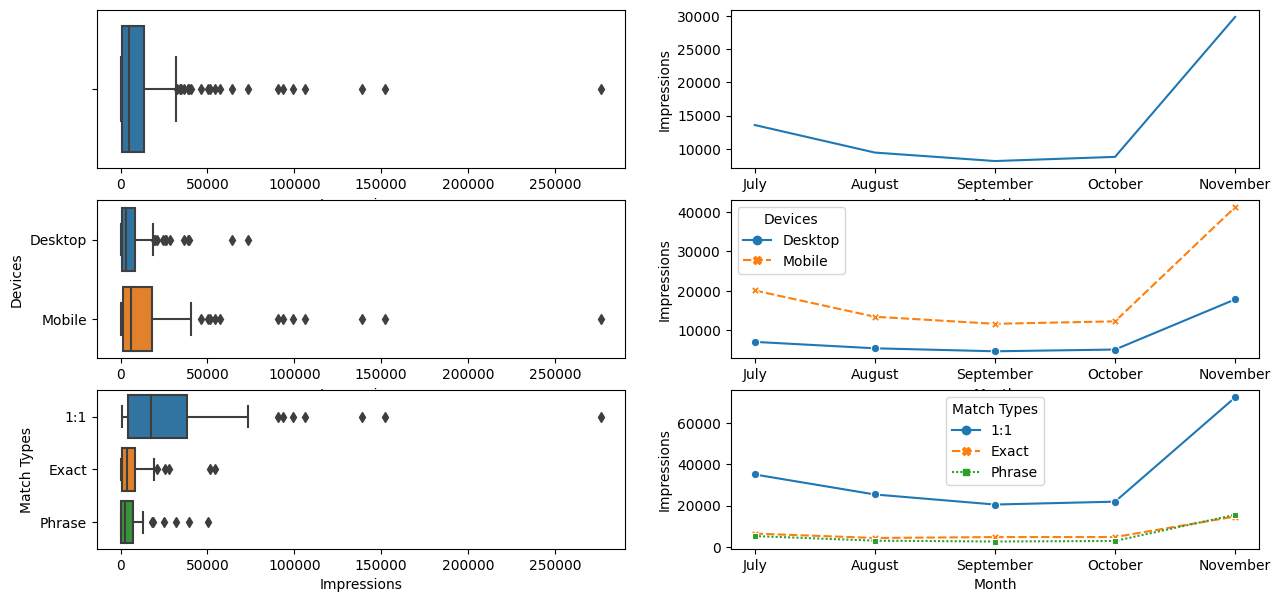

In [58]:
#checking Impressions column

feature = "Impressions"
box_and_line_plots (data= campaign_df, feature=feature)

In [67]:
outliers, top_outliers = find_outliers(data = campaign_df, feature=feature)
top_outliers[:]

Outliers Counts:  21


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad_Type,Devices,CPM,CPA,ROAS,Match Types
151,Shop - 1:1 - Mob - [shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,Coupon,Mobile,138.39,6.42,0.85,1:1
6,Shop - 1:1 - Mob - [shop coupon],July,152394,59177,0.39,2666,0.04,19371,0.33,13699,294536.92,-5672.271,Coupon,Mobile,127.11,7.27,0.71,1:1
159,Shop - 1:1 - Mob - [shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,Promo,Mobile,313.68,5.76,0.97,1:1
40,Shop - 1:1 - Mob - [shop coupon],August,105966,32005,0.30,1530,0.04,10713,0.33,8473,185757.89,-2240.076,Coupon,Mobile,101.10,7.00,0.79,1:1
175,Shop - 1:1 - Mob - [shop coupon code],November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730,Coupon,Mobile,243.30,5.55,1.00,1:1


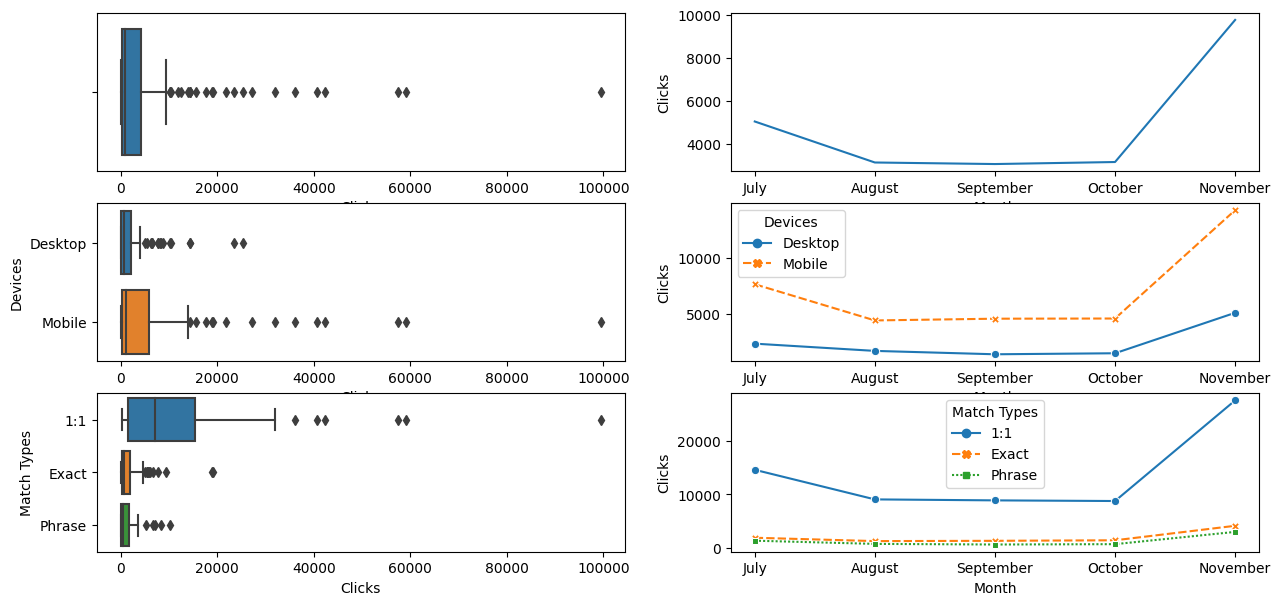

In [69]:
#Checking Clicks column

feature = "Clicks"
box_and_line_plots (data= campaign_df, feature=feature)

In [70]:
outliers, top_outliers = find_outliers(data = campaign_df, feature=feature)
top_outliers[:]

Outliers Counts:  24


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,SalesAmount,P&L,Ad_Type,Devices,CPM,CPA,ROAS,Match Types
151,Shop - 1:1 - Mob - [shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,Coupon,Mobile,138.39,6.42,0.85,1:1
6,Shop - 1:1 - Mob - [shop coupon],July,152394,59177,0.39,2666,0.04,19371,0.33,13699,294536.92,-5672.271,Coupon,Mobile,127.11,7.27,0.71,1:1
159,Shop - 1:1 - Mob - [shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,Promo,Mobile,313.68,5.76,0.97,1:1
175,Shop - 1:1 - Mob - [shop coupon code],November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730,Coupon,Mobile,243.30,5.55,1.00,1:1
76,Shop - 1:1 - Mob - [shop coupon],September,90806,40622,0.45,1421,0.03,10904,0.27,7891,170418.87,-3012.910,Coupon,Mobile,120.08,7.67,0.72,1:1


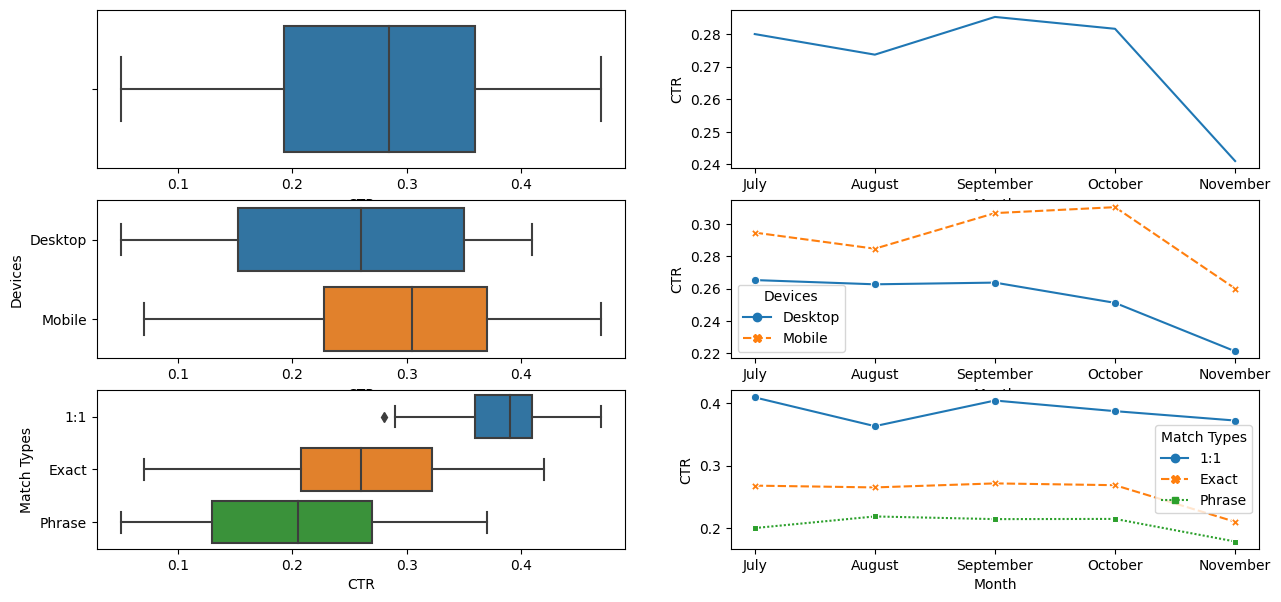

In [71]:
#checking for CTR

feature = "CTR"
box_and_line_plots (data= campaign_df, feature=feature)

In [72]:
outliers, top_outliers = find_outliers(data = campaign_df, feature=feature)
top_outliers[:]

Outliers Counts:  0


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,SalesAmount,P&L,Ad_Type,Devices,CPM,CPA,ROAS,Match Types


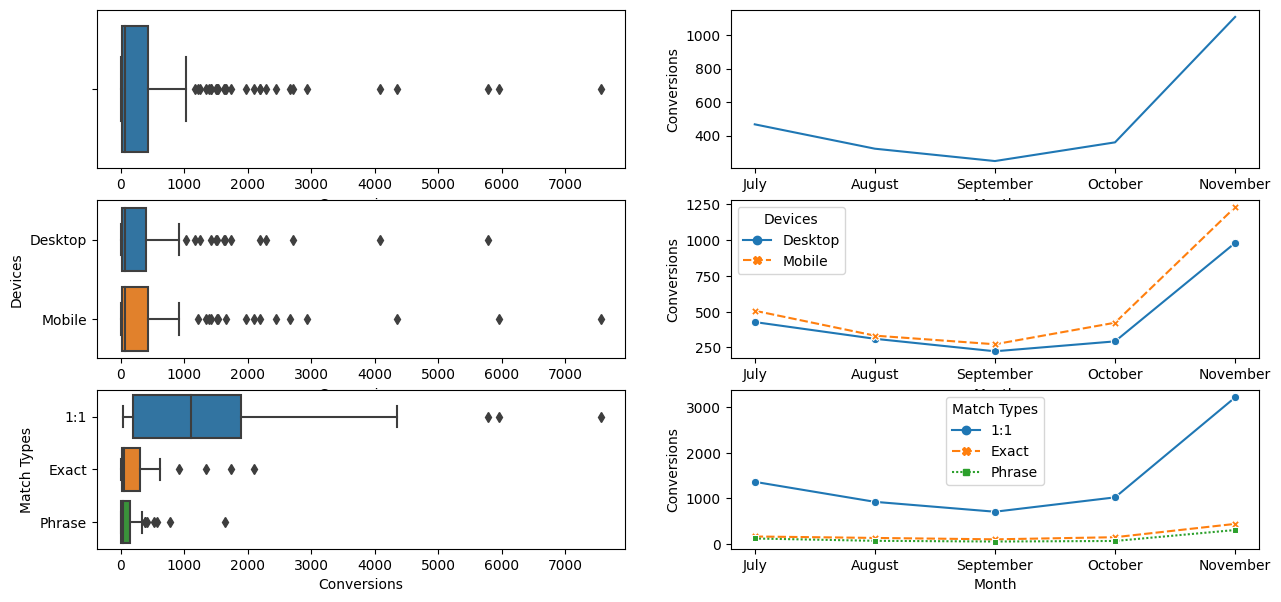

In [73]:
#checking for CTR

feature = "Conversions"
box_and_line_plots (data= campaign_df, feature=feature)

In [74]:
outliers, top_outliers = find_outliers(data = campaign_df, feature=feature)
top_outliers[:]

Outliers Counts:  29


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,SalesAmount,P&L,Ad_Type,Devices,CPM,CPA,ROAS,Match Types
159,Shop - 1:1 - Mob - [shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,Promo,Mobile,313.68,5.76,0.97,1:1
151,Shop - 1:1 - Mob - [shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,Coupon,Mobile,138.39,6.42,0.85,1:1
153,Shop - 1:1 - Desk - [shop promo code],November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,Promo,Desktop,588.90,6.53,0.91,1:1
175,Shop - 1:1 - Mob - [shop coupon code],November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730,Coupon,Mobile,243.30,5.55,1.00,1:1
152,Shop - 1:1 - Desk - [shop coupon],November,73448,25283,0.34,4080,0.10,27336,1.08,23857,497790.81,-3478.644,Coupon,Desktop,372.18,6.70,0.87,1:1


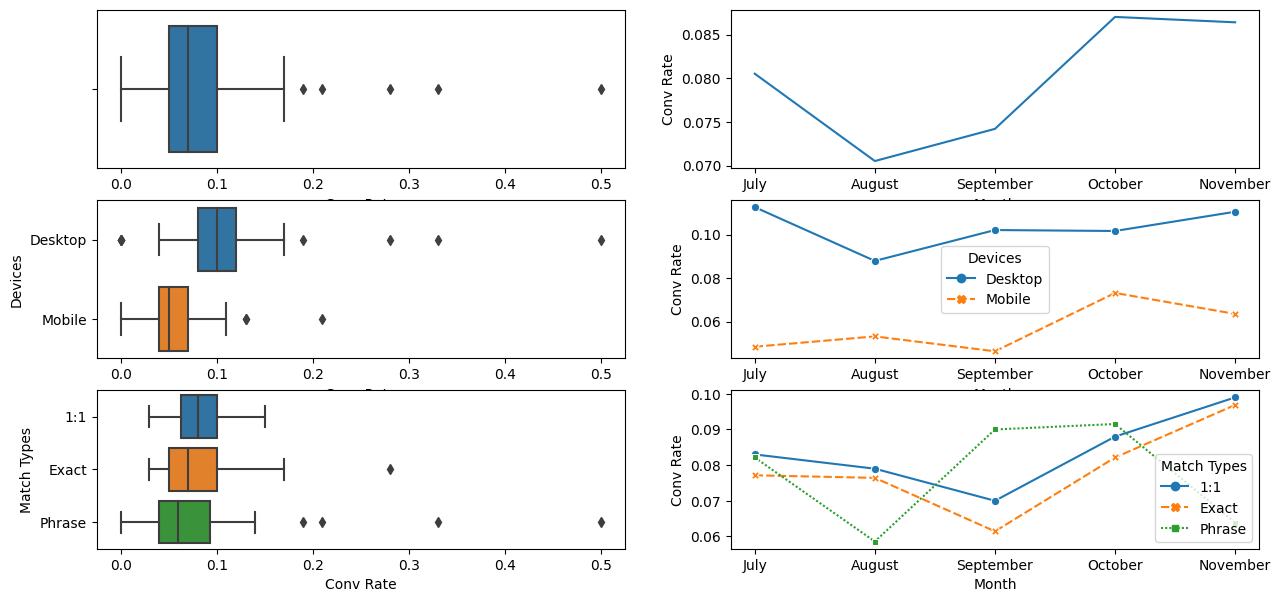

In [78]:
#checking for Conv Rate

feature = "Conv Rate"
box_and_line_plots (data= campaign_df, feature=feature)

In [79]:
outliers, top_outliers = find_outliers(data = campaign_df, feature=feature)
top_outliers[:]

Outliers Counts:  5


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,SalesAmount,P&L,Ad_Type,Devices,CPM,CPA,ROAS,Match Types
112,Shop - Phrase - Desk - Free Shipping,September,52,4,0.08,1,0.50,1,0.43,20,678.00,19.340,Free Shipping,Desktop,19.23,1.00,20.00,Phrase
24,Shop - Phrase - Desk - Competitor,July,36,5,0.14,2,0.33,5,1.05,13,261.40,8.070,Competitor,Desktop,138.89,2.50,2.60,Phrase
185,Shop - Exact - Desk - Black Friday/Cyber Monday,November,257,24,0.09,7,0.28,3,0.14,45,898.80,41.946,Black Friday,Desktop,11.67,0.43,15.00,Exact
150,Shop - Phrase - Mob - Free Shipping,October,100,14,0.14,3,0.21,3,0.26,4,83.20,1.161,Free Shipping,Mobile,30.00,1.00,1.33,Phrase
28,Shop - Phrase - Desk - Offer,July,389,54,0.14,10,0.19,58,1.09,63,1264.52,5.229,Offer,Desktop,149.10,5.80,1.09,Phrase


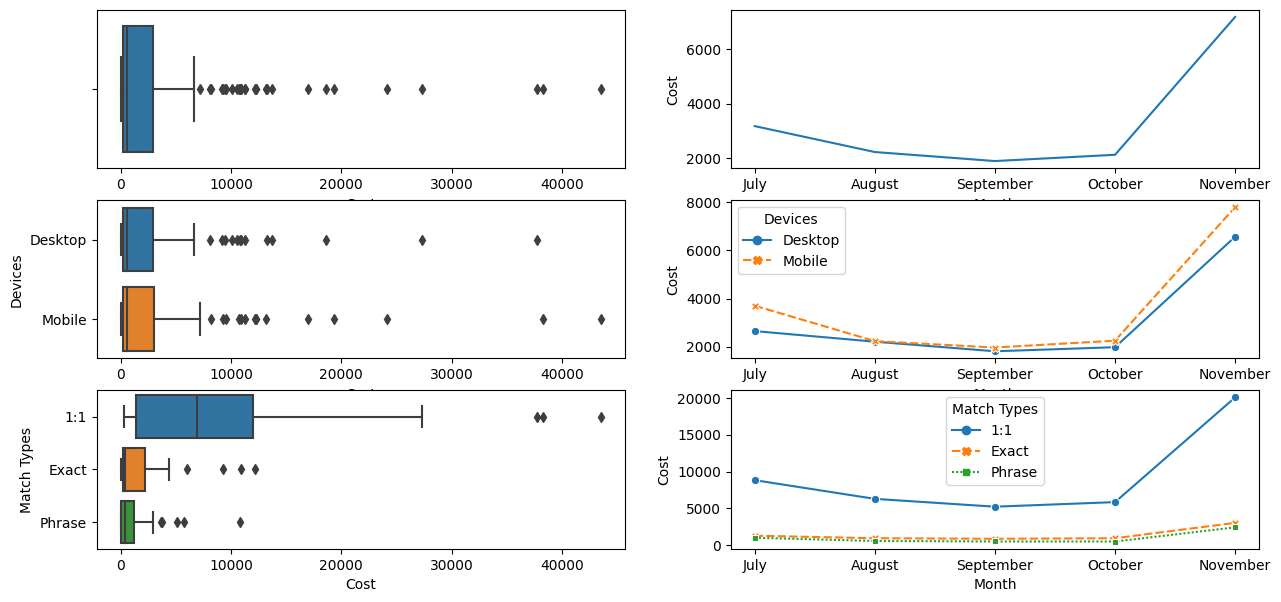

In [80]:
#checking for Cost

feature = "Cost"
box_and_line_plots (data= campaign_df, feature=feature)

In [81]:
outliers, top_outliers = find_outliers(data = campaign_df, feature=feature)
top_outliers[:]

Outliers Counts:  29


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,SalesAmount,P&L,Ad_Type,Devices,CPM,CPA,ROAS,Match Types
159,Shop - 1:1 - Mob - [shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,Promo,Mobile,313.68,5.76,0.97,1:1
151,Shop - 1:1 - Mob - [shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,Coupon,Mobile,138.39,6.42,0.85,1:1
153,Shop - 1:1 - Desk - [shop promo code],November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,Promo,Desktop,588.90,6.53,0.91,1:1
152,Shop - 1:1 - Desk - [shop coupon],November,73448,25283,0.34,4080,0.10,27336,1.08,23857,497790.81,-3478.644,Coupon,Desktop,372.18,6.70,0.87,1:1
175,Shop - 1:1 - Mob - [shop coupon code],November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730,Coupon,Mobile,243.30,5.55,1.00,1:1


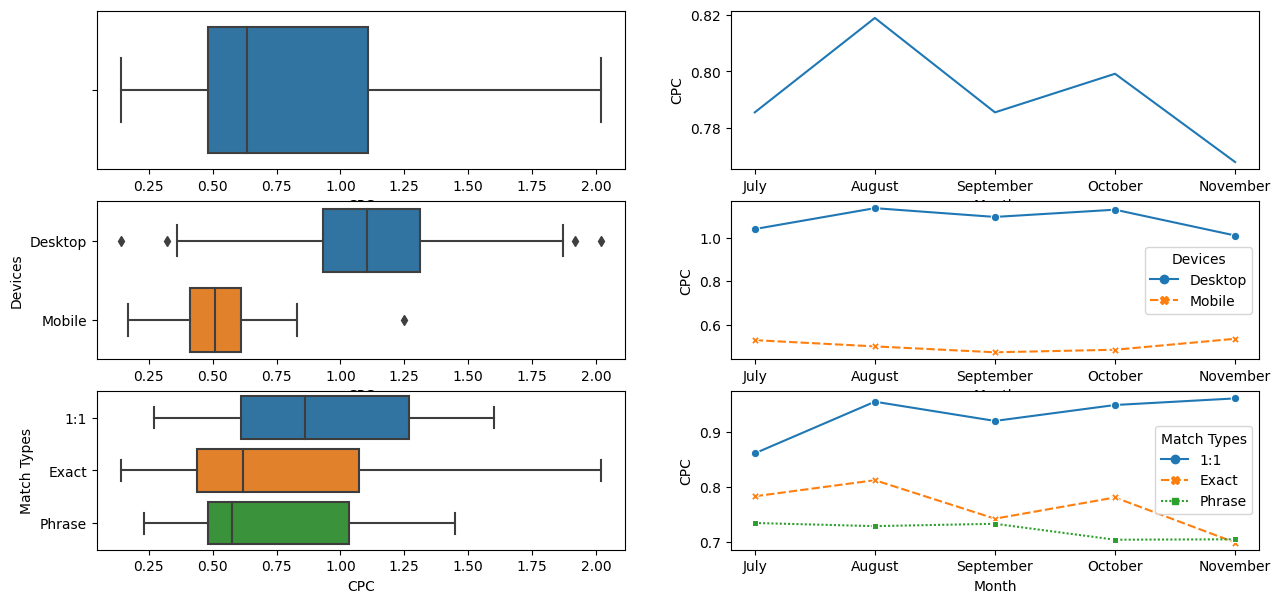

In [82]:
#checking for CPC

feature = "CPC"
box_and_line_plots (data= campaign_df, feature=feature)

In [83]:
outliers, top_outliers = find_outliers(data = campaign_df, feature=feature)
top_outliers[:]

Outliers Counts:  0


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,SalesAmount,P&L,Ad_Type,Devices,CPM,CPA,ROAS,Match Types


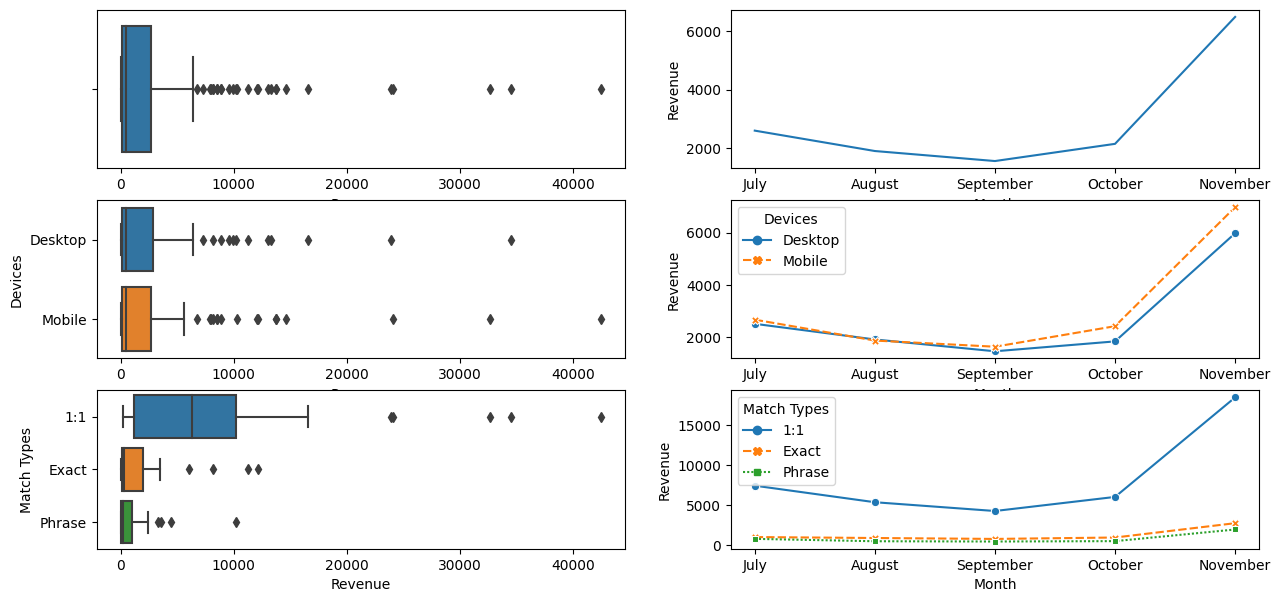

In [84]:
#checking for Revenue

feature = "Revenue"
box_and_line_plots (data= campaign_df, feature=feature)

In [85]:
outliers, top_outliers = find_outliers(data = campaign_df, feature=feature)
top_outliers[:]

Outliers Counts:  28


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,SalesAmount,P&L,Ad_Type,Devices,CPM,CPA,ROAS,Match Types
159,Shop - 1:1 - Mob - [shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,Promo,Mobile,313.68,5.76,0.97,1:1
153,Shop - 1:1 - Desk - [shop promo code],November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,Promo,Desktop,588.90,6.53,0.91,1:1
151,Shop - 1:1 - Mob - [shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,Coupon,Mobile,138.39,6.42,0.85,1:1
175,Shop - 1:1 - Mob - [shop coupon code],November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730,Coupon,Mobile,243.30,5.55,1.00,1:1
152,Shop - 1:1 - Desk - [shop coupon],November,73448,25283,0.34,4080,0.10,27336,1.08,23857,497790.81,-3478.644,Coupon,Desktop,372.18,6.70,0.87,1:1


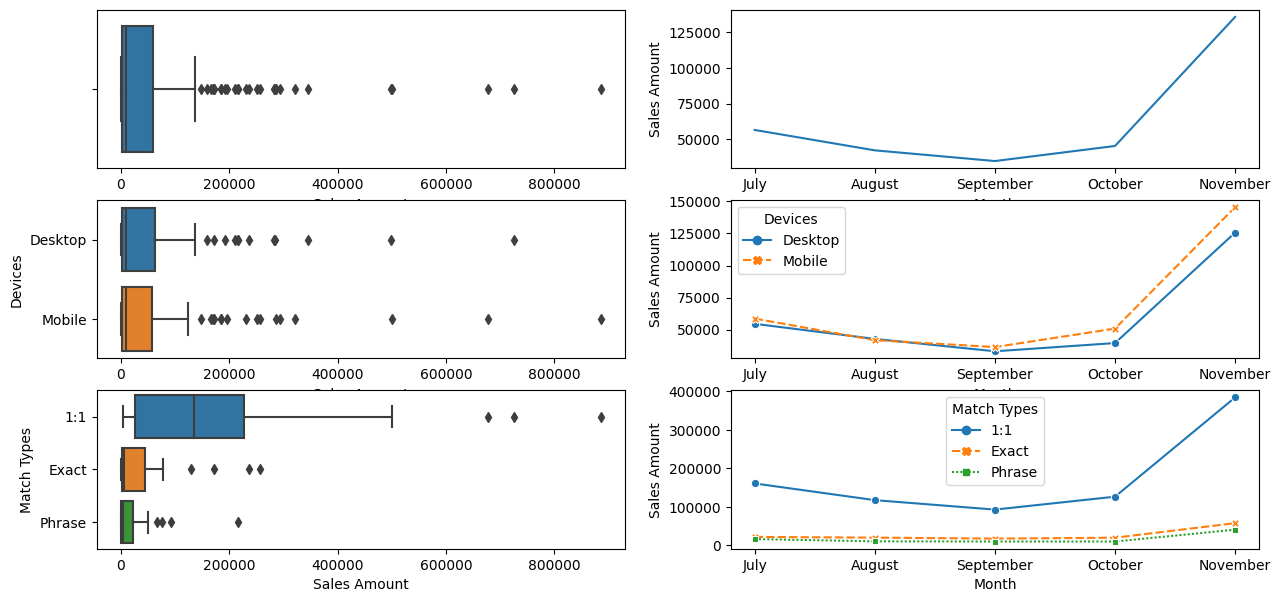

In [90]:
#checking for Sales Amount

feature = "Sales Amount"
box_and_line_plots (data= campaign_df, feature=feature)

In [91]:
outliers, top_outliers = find_outliers(data = campaign_df, feature=feature)
top_outliers[:]

Outliers Counts:  28


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sales Amount,P&L,Ad_Type,Devices,CPM,CPA,ROAS,Match Types
159,Shop - 1:1 - Mob - [shop promo code],November,138811,57405,0.41,7563,0.10,43542,0.76,42440,886095.31,-1101.899,Promo,Mobile,313.68,5.76,0.97,1:1
153,Shop - 1:1 - Desk - [shop promo code],November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,Promo,Desktop,588.90,6.53,0.91,1:1
151,Shop - 1:1 - Mob - [shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,Coupon,Mobile,138.39,6.42,0.85,1:1
175,Shop - 1:1 - Mob - [shop coupon code],November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730,Coupon,Mobile,243.30,5.55,1.00,1:1
152,Shop - 1:1 - Desk - [shop coupon],November,73448,25283,0.34,4080,0.10,27336,1.08,23857,497790.81,-3478.644,Coupon,Desktop,372.18,6.70,0.87,1:1


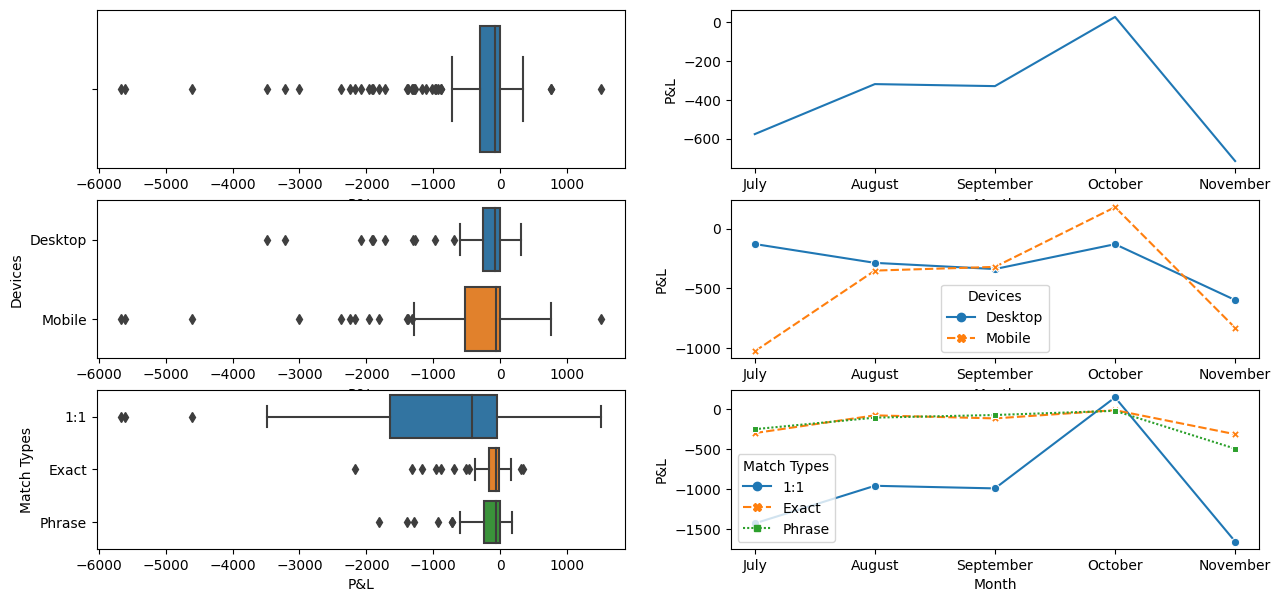

In [98]:
#checking for P&L

feature = "P&L"
box_and_line_plots (data= campaign_df, feature=feature)

In [99]:
outliers, top_outliers = find_outliers(data = campaign_df, feature=feature)
top_outliers[:]

Outliers Counts:  32


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sales Amount,P&L,Ad_Type,Devices,CPM,CPA,ROAS,Match Types
114,Shop - 1:1 - Mob - [shop coupon],October,93406,36068,0.39,2444,0.05,12236,0.34,13744,285638.30,1507.685,Coupon,Mobile,131.00,5.01,1.12,1:1
115,Shop - 1:1 - Mob - [shop promo code],October,34929,15595,0.45,2193,0.09,11258,0.72,12025,252296.27,766.859,Promo,Mobile,322.31,5.13,1.07,1:1
118,Shop - 1:1 - Mob - [shop coupon code],October,28102,12485,0.44,1393,0.07,7192,0.58,7955,166656.05,762.921,Coupon,Mobile,255.92,5.16,1.11,1:1
162,Shop - 1:1 - Mob - [shop discount code],November,18275,8012,0.44,808,0.07,5651,0.71,4773,99420.38,-877.986,Discount,Mobile,309.22,6.99,0.84,1:1
161,Shop - Exact - Mob - Discount Code,November,20699,5540,0.27,320,0.05,2893,0.52,2003,44985.83,-890.164,Discount,Mobile,139.77,9.04,0.69,Exact


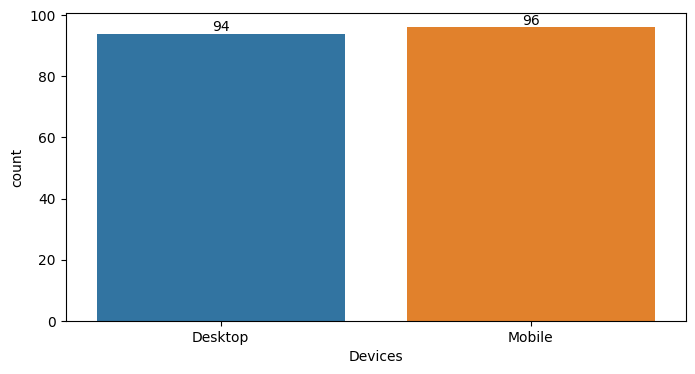

In [101]:
#checking match type

fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x="Devices", data=campaign_df)
ax.bar_label(ax.containers[0])

plt.show()

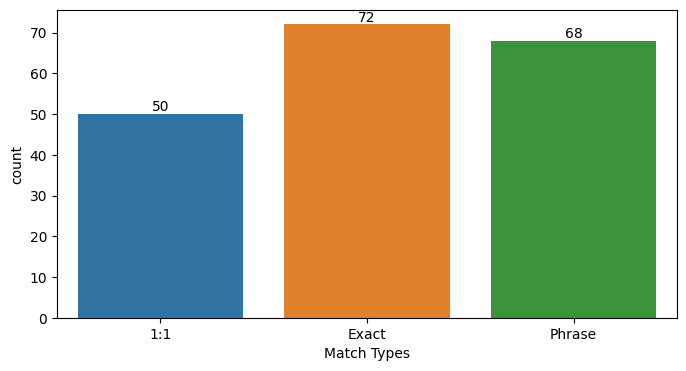

In [102]:
#checking device

fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x="Match Types", data=campaign_df)
ax.bar_label(ax.containers[0])

plt.show()

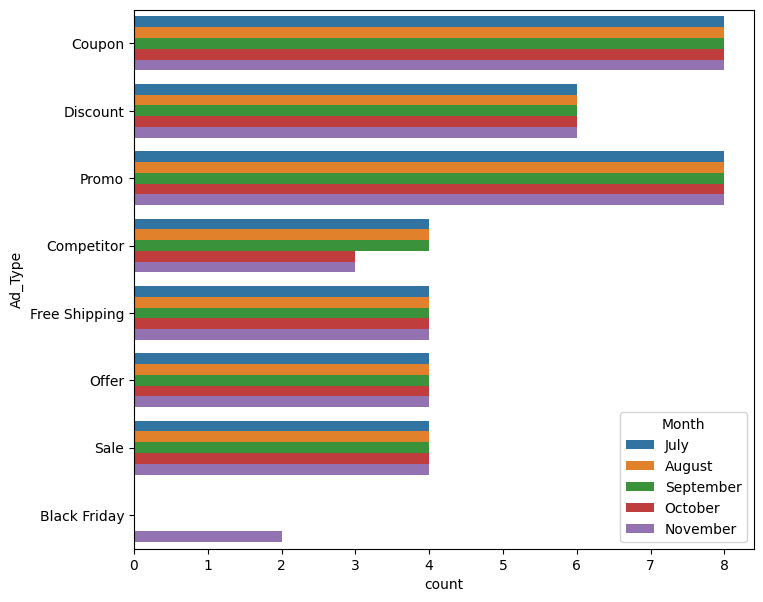

In [105]:
#checking Ad Type

fig, ax = plt.subplots(figsize=(8, 7))
ax = sns.countplot(y="Ad_Type", hue="Month", data=campaign_df)
# ax.bar_label(ax.containers[0])

plt.show()
